* Link gốc bài viết: [https://machinelearningcoban.com/2017/01/16/gradientdescent2/](https://machinelearningcoban.com/2017/01/16/gradientdescent2/)

# 1. Các thuật toán tối ưu Gradient Descent
## 1.1. Momentum


* Xét hàm số:
  $$f(x) = x^2 + 10\sin(x)$$

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def grad(x):
    return 2*x + 10*np.cos(x)

def cost(x):
    return x**2 + 10*np.sin(x)

In [4]:
def has_coverged(theta_new, grad_func):
    return np.linalg.norm(grad_func(theta_new)) / theta_new.shape < 1e-3


def GD_momentum(grad_func, theta_init, eta, gamma):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    
    for it in range(100):
        v_new = gamma * v_old + eta*grad_func(theta[-1])
        theta_new = theta[-1] - v_new
        
        if has_coverged(theta_new, grad_func):
            break
        
        theta.append(theta_new)
        v_old = v_new
        
    return theta

In [18]:

def drawGD1d(x1, ids, nrows = 2, ncols = 4, start = -5.5):
    x0 = np.linspace(start, 5.5, 1000)
    y0 = cost(x0)
    width = 4*ncols
    height = 4*nrows
    
    plt.close('all')
    fig, axs = plt.subplots(nrows, ncols, figsize = (width, height))
    
    for i, k in enumerate(ids):
        r = i//ncols
        c = i%ncols
        
        x = x1[ids[i]]
        y = cost(x)
        str0 = f'iter {ids[i]}/{len(x1) - 1}'
        
        if nrows > 1:
            axs[r, c].plot(x0, y0, 'b')
            axs[r, c].set_xlabel(str0, fontsize=13)
            axs[r, c].plot(x, y, 'ro', markersize=7, markeredgecolor='k') # vẽ điểm đỏ
            axs[r, c].plot()
            axs[r, c].tick_params(axis='both', which='major', labelsize=13) # làm cho các thang chia rộng ra
        else:
            axs[c].plot(x0, y0, 'b')
            axs[c].set_xlabel(str0, fontsize=13)
            axs[c].plot(x, y, 'ro', markersize=7, markeredgecolor='k')
            axs[c].plot()
            axs[c].tick_params(axis='both', which='major', labelsize=13)
            
    plt.show()

In [19]:
w_init = np.array([2, 1])
w1 = GD_momentum(grad, w_init, 0.5, 0.9)

w1[-1], len(w1)

(array([ 1.82744811, -3.82063931]), 101)

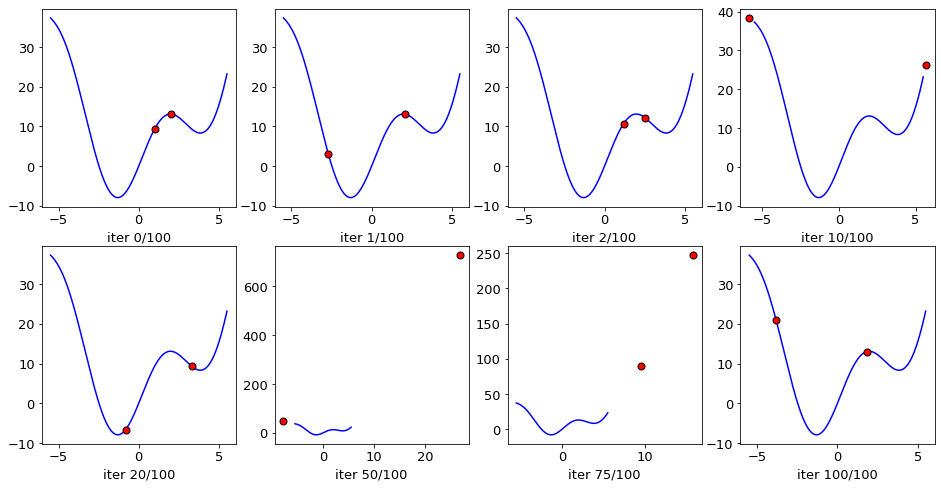

In [22]:
ids = [0, 1, 2, 10, 20, 50, 75, 100]
drawGD1d(w1, ids)